In [144]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import seaborn as sns #Visualization

### function defention 

In [145]:
    
    def preprocessing(X):
        return np.c_[np.ones([X.shape[0],1]),X]
    
    def compute_r2(y_true, y_predicted):
        sse = sum((y_true - y_predicted)**2) # why not to use np before sum? 
        tse = (len(y_true) - 1) * np.var(y_true, ddof=1) # what is this ?
        r2_score = 1 - (sse / tse) 
        return r2_score, sse, tse
"""
  
    
    # calculate TSE
    mean = np.mean(y_true)
    tse = np.sum((y_true - mean)**2)
    
    
"""
    
    def compute_rss_rse(y_true, y_predicted):
        rss=np.sum(np.square(y_true- y_predicted))
        rse = np.sqrt(rss / (len(y_true) - 2))
        return rss,rse
    
    def predict(X,theta):
        X =preprocessing(X)
        return X.dot(theta)
    

### data preparing

In [170]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


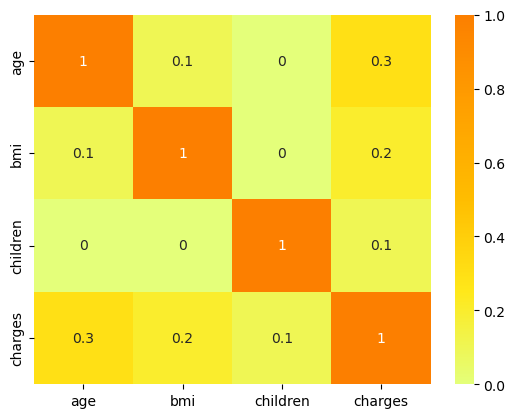

In [113]:
# correlation plot
corr = df.corr().round(1)
sns.heatmap(corr, cmap = 'Wistia', annot= True);

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64


<AxesSubplot:ylabel='region'>

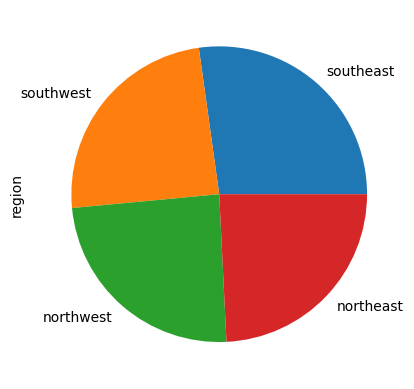

In [171]:
charges_1= df['region'].value_counts(normalize=True)
print(charges_1)
charges_1.plot(kind='pie')

no     0.795217
yes    0.204783
Name: smoker, dtype: float64


<AxesSubplot:ylabel='smoker'>

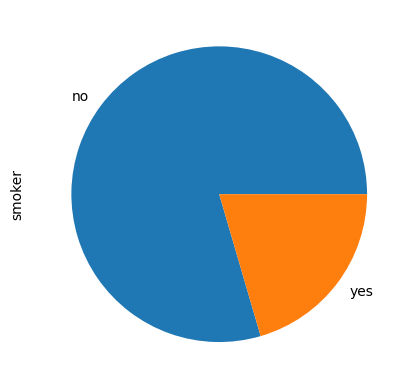

In [181]:
charges_1= df['smoker'].value_counts(normalize=True)
print(charges_1)
charges_1.plot(kind='pie')

In [21]:
os.getcwd()

'C:\\Users\\Farah\\Downloads'

0    0.428999
1    0.242152
2    0.179372
3    0.117339
4    0.018685
5    0.013453
Name: children, dtype: float64


<AxesSubplot:>

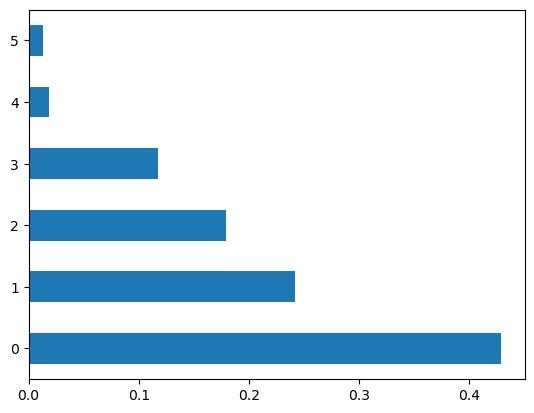

In [179]:
charges_1= df['children'].value_counts(normalize=True)
print(charges_1)
charges_1.plot(kind='barh')

In [114]:
df. describe(include='O') 

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [147]:
df["sex"].replace({"male": 0, "female": 1}, inplace=True) # Male: 0, Female: 1
df["smoker"].replace({"yes": 1, "no": 0}, inplace=True) # Yes: 1, No: 0

df = pd.get_dummies(df) # divide regions column into four different column with binary labels
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


0    0.505232
1    0.494768
Name: sex, dtype: float64


<AxesSubplot:ylabel='sex'>

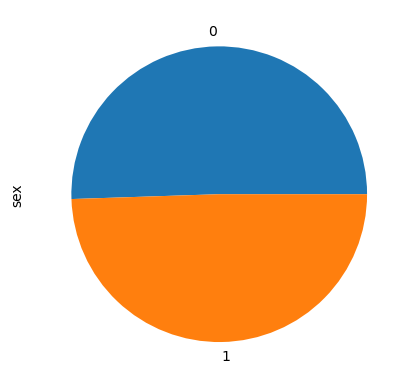

In [168]:
charges_1= df['sex'].value_counts(normalize=True)
print(charges_1)
charges_1.plot(kind='pie')


In [148]:
charges = df.pop('charges') 
df['charges']=charges
df

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,1,27.900,0,1,0,0,0,1,16884.92400
1,18,0,33.770,1,0,0,0,1,0,1725.55230
2,28,0,33.000,3,0,0,0,1,0,4449.46200
3,33,0,22.705,0,0,0,1,0,0,21984.47061
4,32,0,28.880,0,0,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,1,0,0,10600.54830
1334,18,1,31.920,0,0,1,0,0,0,2205.98080
1335,18,1,36.850,0,0,0,0,1,0,1629.83350
1336,21,1,25.800,0,0,0,0,0,1,2007.94500


In [39]:
data=np.array(df)
data.shape

(1338, 10)

In [104]:
df.describe()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,0.242152,0.242900,0.272048,0.242900,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,0.428546,0.428995,0.445181,0.428995,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,63770.428010


In [40]:
data[0][9]#the target y 9

16884.924

In [149]:
X=data[:,0:9]
y=data[:,9:]
data_norm=(X-X.mean(axis=0))/X.std(axis=0)
data_norm.shape, y.shape
# this has to be amended its standarzation equation not normalization


((1338, 9), (1338, 1))

In [49]:
# Extra cell ................................................

X=data[:,0:9]
y=data[:,9:]
data_norm=(X - np.min(X)) / (np.max(X) - np.min(X))
data_norm.shape, y.shape

((1338, 9), (1338, 1))

In [150]:
y[:10],data_norm[0]
# just to make sure that all values are between 0 and 1 ??

(array([[16884.924  ],
        [ 1725.5523 ],
        [ 4449.462  ],
        [21984.47061],
        [ 3866.8552 ],
        [ 3756.6216 ],
        [ 8240.5896 ],
        [ 7281.5056 ],
        [ 6406.4107 ],
        [28923.13692]]),
 array([-1.43876426,  1.0105187 , -0.45332   , -0.90861367,  1.97058663,
        -0.56526686, -0.56641788, -0.61132367,  1.76548098]))

In [151]:
# Now I want to train the model according to pareto princple 
splitter=int(len(X)*0.8) #pareto principle
splitter

1070

In [152]:
X_train=data_norm[:splitter]
y_train=y[:splitter]
X_test=data_norm[splitter:]
y_test=y[splitter:]

In [63]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape
# train 1070 and test 268

((1070, 9), (1070, 1), (268, 9), (268, 1))

In [ ]:
print (X_train)
print ('______________________________________________________________________________')
print (y_train)
print ('______________________________________________________________________________')
print ( X_test)
print ('______________________________________________________________________________')
print (y_test)


###  normal_equation

In [153]:
X_b=np.c_[np.ones([X_train.shape[0],1]),X_train] # book page 117
# Calculate theta using least square equation : inv(XT*X)XT*y
theta=np.dot(np.linalg.inv(np.dot(X_b.transpose(),X_b)),np.dot(X_b.transpose(),y_train))
print (X_b)


[[ 1.         -1.43876426  1.0105187  ... -0.56641788 -0.61132367
   1.76548098]
 [ 1.         -1.50996545 -0.98959079 ... -0.56641788  1.63579466
  -0.56641788]
 [ 1.         -0.79795355 -0.98959079 ... -0.56641788  1.63579466
  -0.56641788]
 ...
 [ 1.         -0.01474046 -0.98959079 ... -0.56641788 -0.61132367
  -0.56641788]
 [ 1.          1.69408811 -0.98959079 ...  1.76548098 -0.61132367
  -0.56641788]
 [ 1.          1.0532774   1.0105187  ... -0.56641788  1.63579466
  -0.56641788]]


In [154]:
theta

array([[13185.46749758],
       [ 3644.96154247],
       [  126.03638843],
       [ 2061.40019243],
       [  529.07002573],
       [ 9544.24533768],
       [  304.        ],
       [  128.        ],
       [ -224.        ],
       [ -256.        ]])

In [155]:
# use functions 
y_predict = predict (X_test,theta)
r2_score, sse, tse=compute_r2(y_test,y_predict)
rss,rse=compute_rss_rse(y_test,y_predict)
r2_score,rss,rse
print(f"the r2 is {r2_score[0]} the rss is {rss} the rse is {rse}")

the r2 is 0.7583414104279613 the rss is 9969066810.578518 the rse is 6121.9028721967625


In [ ]:
#plt.plot(X_test, y_test, "r-")
plt.plot(X, y, "b.")
plt.axis([10000,20000])
plt.show()
# page 117??????????????????????????????????

In [84]:
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

### gradient descent 

In [156]:
eta = 0.1  # learning rate
n_iterations = 100
m = X.shape[0] # m is the batch size, which is the number of training examples used in each iteration
theta = np.random.randn(len(X_b[0]), 1)  # random initialization

# the above from book page 124

X_b=np.c_[np.ones([X_train.shape[0],1]),X_train] #preprocessing



rss_lst =[]
rse_lst =[]

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y_train)
    theta = theta - eta * gradients
    rss,rse=compute_rss_rse(y_train, X_b.dot(theta))
    rss_lst.append(rss)
    rse_lst.append(rse)
theta

array([[13185.52618532],
       [ 3644.46861654],
       [  126.89169257],
       [ 2067.6585255 ],
       [  529.21570942],
       [ 9545.17841978],
       [  307.32874278],
       [  105.38286861],
       [ -178.83702586],
       [ -226.64496335]])

In [100]:
m

1338

In [16]:
#on test data
y_predict = predict(X_test,theta)
r2_score, sse, tse=compute_r2(y_test,y_predict)
rss,rse=compute_rss_rse(y_test,y_predict)
print(f"the r2 is {r2_score[0]} the rss is {rss} the rse is {rse}")

the r2 is 0.758484705830502 the rss is 9963155489.801105 the rse is 6120.087561969156


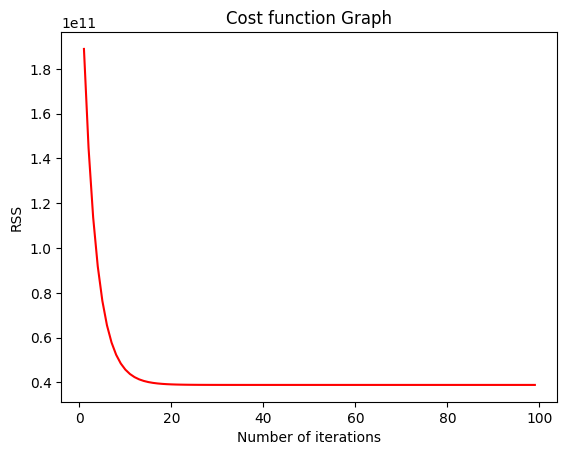

Text(0, 0.5, 'RSE')

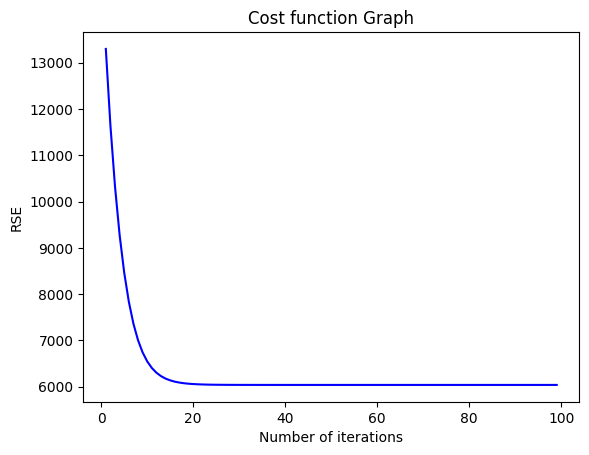

In [17]:
plt.plot(np.arange(1,n_iterations),rss_lst[1:], color = 'red')
plt.title('Cost function Graph')
plt.xlabel('Number of iterations')
plt.ylabel('RSS')
plt.show()
plt.plot(np.arange(1,n_iterations),rse_lst[1:], color = 'blue')
plt.title('Cost function Graph')
plt.xlabel('Number of iterations')
plt.ylabel('RSE')

In [24]:
eta_ls= np.arange(0.005, 0.15, 0.005)
rss_lst =[]
rse_lst=[]
for eta in eta_ls:
 # learning rate
    n_iterations = 50
    m = X.shape[0]

    X_b=np.c_[np.ones([X_train.shape[0],1]),X_train] #preprocessing
    theta = np.random.randn(len(X_b[0]), 1)  # random initialization

    for iteration in range(n_iterations):
        gradients = 1/m * X_b.T.dot(X_b.dot(theta) - y_train)
        theta = theta - eta * gradients
    rss,rse=compute_rss_rse(y_train, X_b.dot(theta))
    rss_lst.append(rss)
    rse_lst.append(rse)


array([[13156.41647549],
       [ 3647.51453147],
       [  110.18735581],
       [ 2054.43755973],
       [  527.21463343],
       [ 9513.18404502],
       [  305.57941044],
       [   99.02566916],
       [ -167.85786866],
       [ -229.0444239 ]])

Text(0, 0.5, 'RSE')

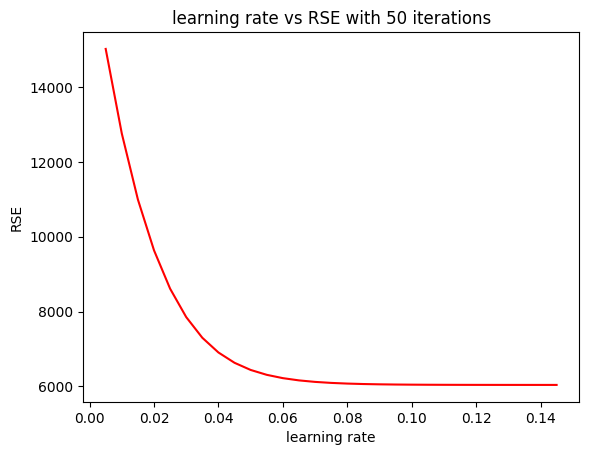

In [19]:
plt.plot(eta_ls,rse_lst, color = 'red')
plt.title('learning rate vs RSE with 50 iterations')
plt.xlabel('learning rate')
plt.ylabel('RSE')

In [20]:
eta_ls= [0.1,0.075,0.05,0.025,0.01]
cost_lst=[]
for eta in eta_ls:
 # learning rate
    rse_lst=list()
    n_iterations = 100
    m = X.shape[0]

    X_b=np.c_[np.ones([X_train.shape[0],1]),X_train] #preprocessing
    theta = np.random.randn(len(X_b[0]), 1)  # random initialization

    for iteration in range(n_iterations):
        gradients = 1/m * X_b.T.dot(X_b.dot(theta) - y_train)
        theta = theta - eta * gradients
        rss,rse=compute_rss_rse(y_train, X_b.dot(theta))
        rse_lst.append(rse)
    cost_lst.append(rse_lst)

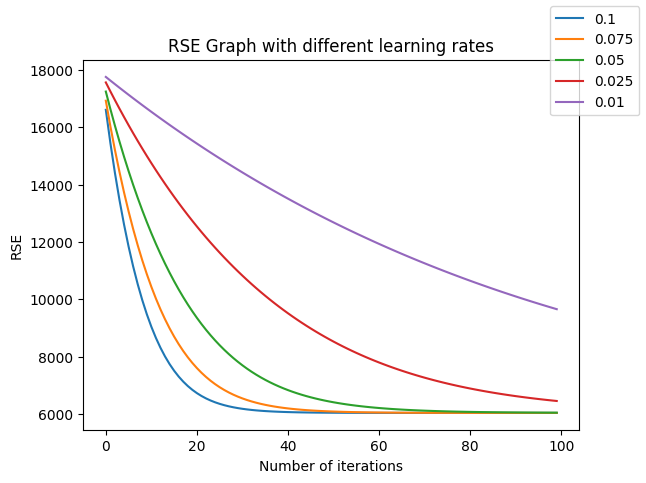

In [21]:
fig,ax = plt.subplots()
ax=plt.plot(np.arange(n_iterations),cost_lst[0],label="0.1")
ax=plt.plot(np.arange(n_iterations),cost_lst[1],label="0.075")
ax=plt.plot(np.arange(n_iterations),cost_lst[2],label="0.05")
ax=plt.plot(np.arange(n_iterations),cost_lst[3],label="0.025")
ax=plt.plot(np.arange(n_iterations),cost_lst[4],label="0.01")
plt.title('RSE Graph with different learning rates')
plt.xlabel('Number of iterations')
plt.ylabel('RSE')
fig.legend()
plt.show()

In [26]:
eta_ls= [0.1,0.075,0.05,0.025,0.01]
cost_lst=[]
for eta in eta_ls:
 # learning rate
    rse_lst=list()
    n_iterations = 100
    m = X.shape[0]

    X_b=np.c_[np.ones([X_train.shape[0],1]),X_train] #preprocessing
    theta = np.random.randn(len(X_b[0]), 1)  # random initialization

    for iteration in range(n_iterations):
        gradients = 1/m * X_b.T.dot(X_b.dot(theta) - y_train)
        theta = theta - eta * gradients
        r2,rss,rse=compute_r2(y_train, X_b.dot(theta))
        rse_lst.append(r2)
    cost_lst.append(rse_lst)

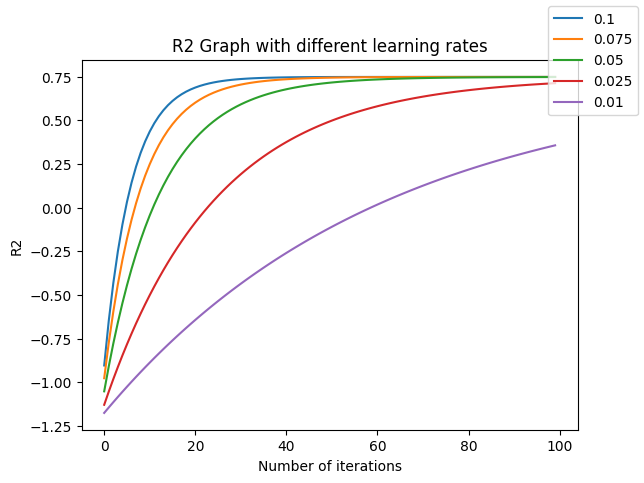

In [29]:
fig,ax = plt.subplots()
ax=plt.plot(np.arange(n_iterations),cost_lst[0],label="0.1")
ax=plt.plot(np.arange(n_iterations),cost_lst[1],label="0.075")
ax=plt.plot(np.arange(n_iterations),cost_lst[2],label="0.05")
ax=plt.plot(np.arange(n_iterations),cost_lst[3],label="0.025")
ax=plt.plot(np.arange(n_iterations),cost_lst[4],label="0.01")
plt.title('R2 Graph with different learning rates')
plt.xlabel('Number of iterations')
plt.ylabel('R2')
fig.legend()
plt.show()